In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import matplotlib.colors
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
full_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[41.,50.],'lonlim':[0.,20.]}
normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon = ds.LON[jmin:jmax,imin:imax]
lat = ds.LAT[jmin:jmax,imin:imax]
H = ds.SH[jmin:jmax,imin:imax]

In [3]:
les_season_max = np.load('/home/philinat/Stage-M2/saved_data_MAR_ERA5/les_season_max.npy')[:,:,jmin:jmax,imin:imax]

In [48]:
years = np.arange(1980,2021,1)
nt,ns,nlat,nlon = np.shape(les_season_max)

year_max = np.argmax(les_season_max,axis=0)+1980

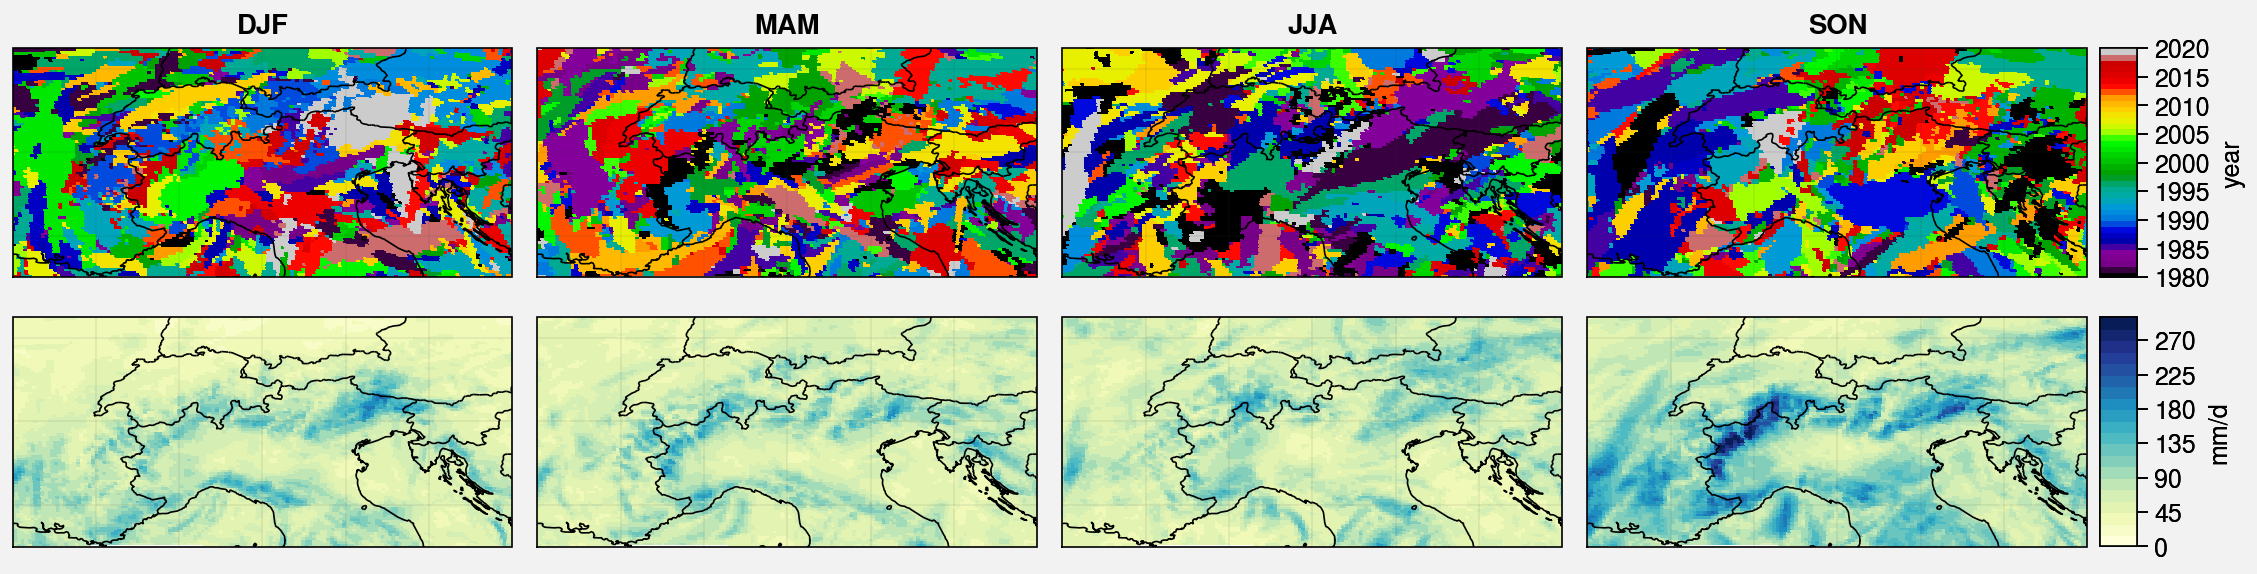

In [49]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=2)
for i in range(4):
    cb_year = axs[i].pcolormesh(lon,lat,year_max[i,:,:],levels=years,cmap='nipy_spectral')
    cb_prec = axs[i+4].pcolormesh(lon,lat,np.max(les_season_max[:,i,:,:],axis=0),levels=np.linspace(0,300,21),cmap='YlGnBu')
f.colorbar(cb_year, ax=axs[3],label= 'year')
f.colorbar(cb_prec, ax=axs[7],label= 'mm/d')
axs.format(**multiplot_format,suptitle='',collabels=['DJF','MAM','JJA', 'SON'])#,rowlabels=['ERA5'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


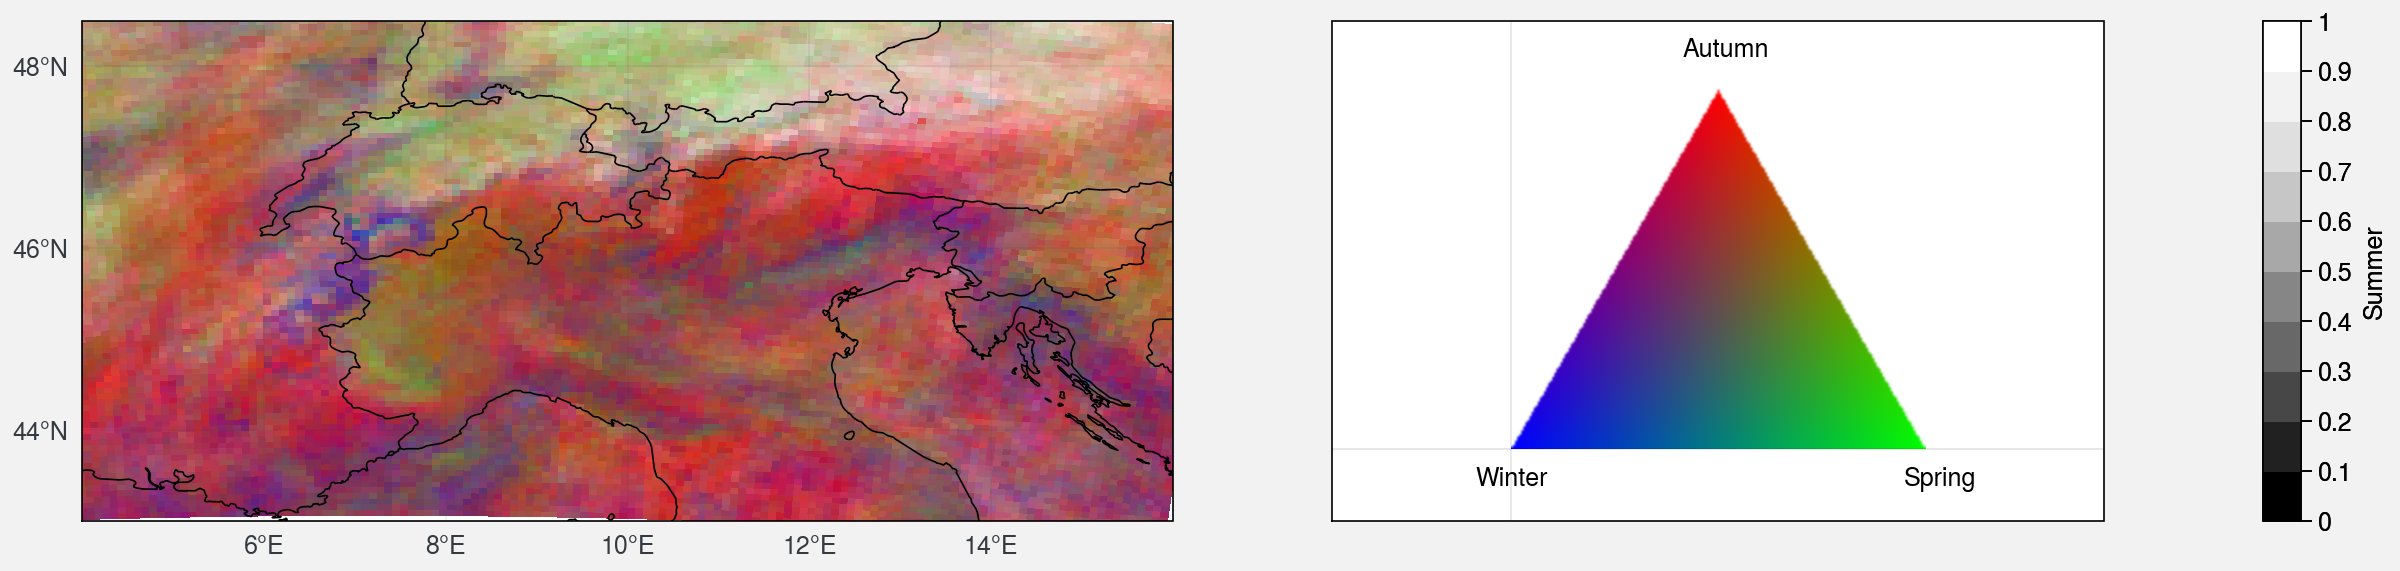

In [34]:



season_year = np.argmax(les_season_max[:,:,:,:],axis=1)
nt,ns,nlat,nlon = np.shape(les_season_max)
rgb = np.ones((nlat,nlon,3))

for i,s in enumerate([3,1,0]): # 3=red=autumn / 1=green=spring / 0=blue=winter
    rgb[:,:,i] = np.sum(season_year == s,axis=0) / nt
rgb += 1- np.reshape(np.sum(rgb,axis=2),(nlat,nlon,1))

f, axs = pplt.subplots(proj='cyl',ncols=2, nrows=1,width=12)
color_tuple = rgb.reshape((rgb.shape[0]*rgb.shape[1],rgb.shape[2]))#/255.0
m =axs[0].pcolormesh(lon,lat,H,facecolor=color_tuple, linewidth=0)
m.set_array(None)
axs[0].format(**normal_format,suptitle='')

def rgb_distances(x,y):
    # rgb = np.ma.array(np.zeros((n,n,3)))
    rgb = np.zeros((n,n,3))
    rgb[:,:,0]=y
    rgb[:,:,1]=np.sqrt( ((np.sqrt(3)*x-y)**2 + (np.sqrt(3)*y-3*x)**2 )/16)
    rgb[:,:,2]=np.sqrt( ((2-np.sqrt(3)*x-y)**2 + (2*np.sqrt(3)-np.sqrt(3)*y-3*x)**2 )/16)
    sums = np.sum(rgb,axis=2)
    for i in range(3):
        # rgb[:,:,i] = np.ma.masked_where((sums>1),rgb[:,:,i])
        rgb[:,:,i][sums>1.+10**-15] = 1.#np.nan
    return rgb

n=201
x=np.linspace(0,2/np.sqrt(3),n,endpoint=True)
y=np.linspace(0,2/np.sqrt(3),n,endpoint=True)
xx,yy = np.meshgrid(x,y)
rgb = rgb_distances(xx,yy)
axs[1].imshow(rgb,origin='lower',extent=(0,1.16,0,1.16),interpolation='bicubic')
axs[1].set_xlim([-0.5,1.66])
axs[1].set_ylim([-0.2,1.2])
axs[1].text(0.48,1.1,"Autumn")
axs[1].text(-0.1,-0.1,"Winter")
axs[1].text(1.1,-0.1,"Spring")

f.colorbar(plt.imshow([[0.33,1],[0.33,1]],cmap='Greys_r',vmin=0,vmax=1,visible=False),
             ax=axs[1], orientation='vertical',
             label="Summer")


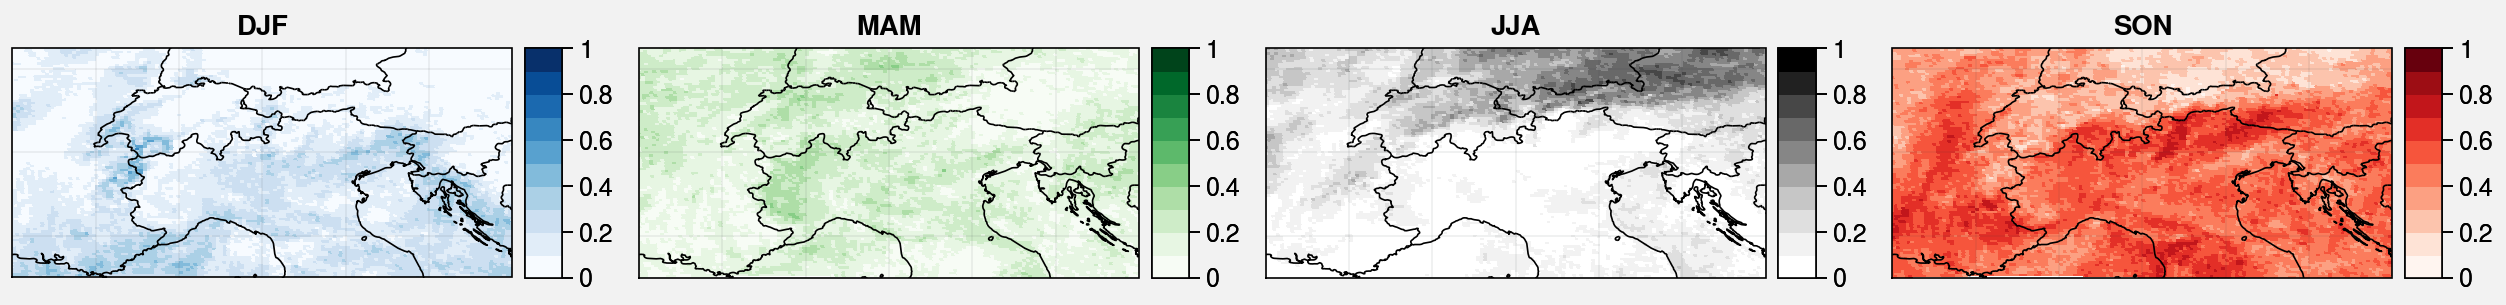

In [17]:
f, axs = pplt.subplots(proj='cyl',ncols=4, nrows=1)
for s,i in enumerate([2,1,3,0]):
    if i<3:
        season_fraction = season_color[:,:,i]
    elif i==3:
        season_fraction = 1-np.sum(season_color,axis=2)
    cb = axs[s].pcolormesh(lon,lat,season_fraction,levels=np.linspace(0,1,11),cmap=['Blues','Greens','Greys','Reds'][s])
    f.colorbar(cb, ax=axs[s],label= '')
axs.format(**multiplot_format,suptitle='',collabels=['DJF','MAM','JJA', 'SON'])#,rowlabels=['ERA5'])

In [50]:
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/MARgrid_EUl.nc')
lon = ds.LON.data
lat = ds.LAT.data
H = ds.SH.data

ds = xr.open_dataset('/bettik/menegozm/EURO4M_APGD/06-coord_lonlat.nc')
lon_APGD , lat_APGD = ds.Longitude.data , ds.Latitude.data

def get_event(year,season,jlat,ilon):
    
    ds_rr = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBrr.'+str(year)+'.nc')
    ds_sf = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.MBsf.'+str(year)+'.nc')
    

    prec = (ds_rr.MBrr+ds_sf.MBsf).data
    # # print(prec.data)
    # if len(prec[:,jlat,ilon])==365:
    #     season_limits = np.array([0,59,151,243,334])
    # elif len(prec[:,jlat,ilon])==366:
    #     season_limits = np.array([0,60,152,244,335])
    mask = ds_rr.time.dt.season == ['DJF','MAM','JJA', 'SON'][season]
    subset_idx = np.argmax(prec[:,jlat,ilon][mask])
    iday = np.arange(prec.shape[0])[mask][subset_idx]
    print(str(ds_rr.time.data[iday])[:10],prec[iday,jlat,ilon])
    
    ds_pr = xr.open_dataset('/bettik/philinat/EURO4M_APGD/APGD_'+str(year)+'.nc')
    prec_APGD = ds_pr.PRECIPITATION.data[iday]
    
    Tmean = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.TTz.'+str(year)+'.nc').TTz.data[iday,0,:,:]
    Tmin = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.TTmin.'+str(year)+'.nc').TTmin.data[iday,0,:,:]
    SP = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.SP.'+str(year)+'.nc').SP.data[iday,:,:]
    # SLP = SP * (1-  0.0065*H/ (Tmean+273.15+0.0065*H))**(-5.257)
    SLP = SP * (1-  0.0065*H/ (Tmin+273.15+0.0065*H))**(-5.257)
    
    Q = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.QQz.'+str(year)+'.nc').QQz.data[iday,3,:,:]
    
    U = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.UUz.'+str(year)+'.nc').UUz.data[iday,3,:,:]
    V = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.VVz.'+str(year)+'.nc').VVz.data[iday,3,:,:]
    
    xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_ERA20C/EUf/*/'+str(year)+'/ICE.*.'+str(year)+'.08.01-*.nc')
    # U = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.UUp.'+str(year)+'.nc').UUp.data[iday,1,:,:]
    # V = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA5/daily/ICE.ERA5_v1.EUl.VVp.'+str(year)+'.nc').VVp.data[iday,1,:,:]
    return prec[iday],prec_APGD,SLP,Q,U,V

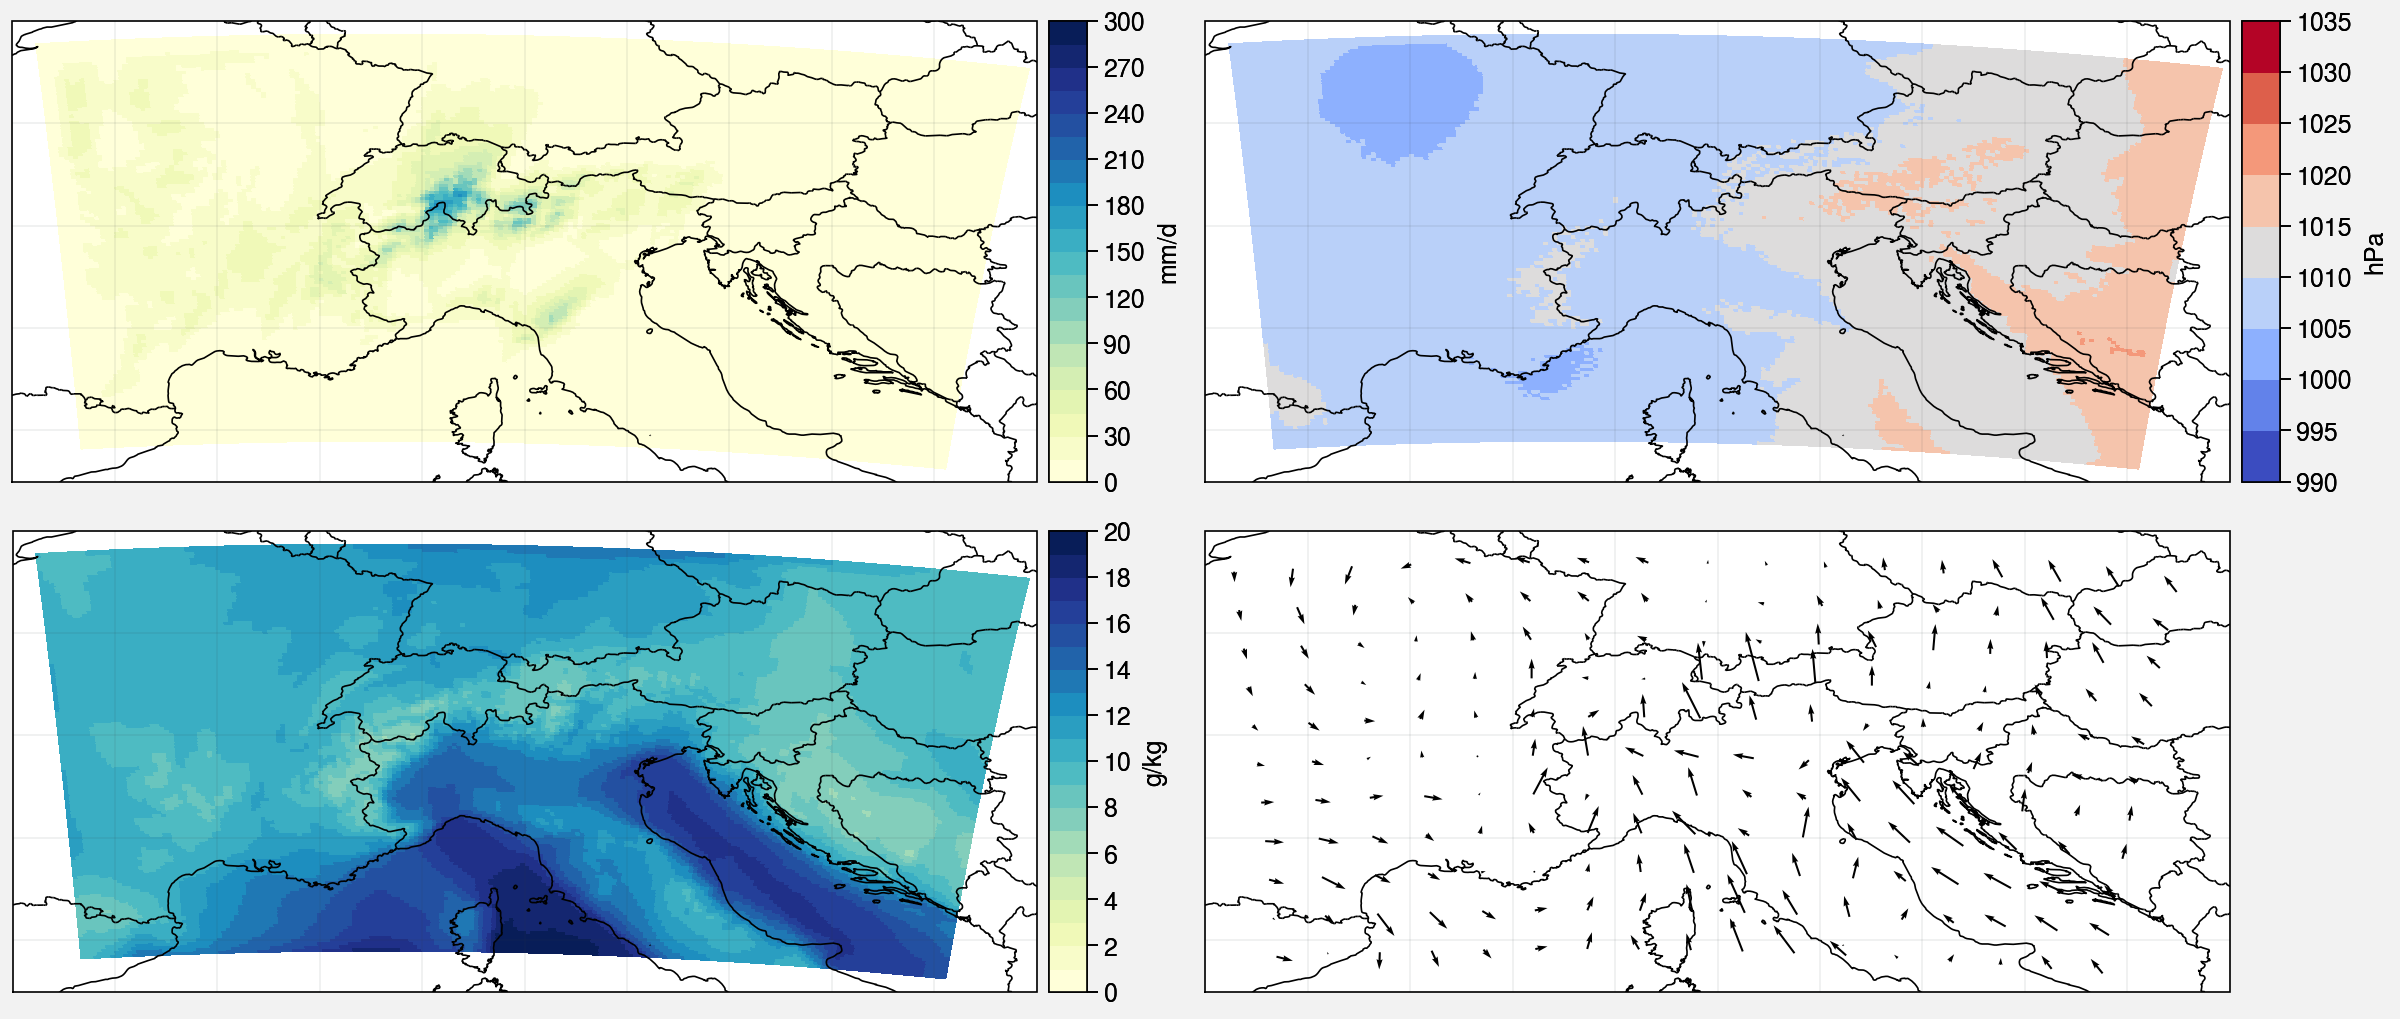

In [38]:
f, axs = pplt.subplots(proj='cyl',ncols=2, nrows=2,width=12)
cb_prec = axs[0].pcolormesh(lon,lat,prec,levels=np.linspace(0,300,21),cmap='YlGnBu')
cb_SLP = axs[1].pcolormesh(lon,lat,SLP,levels=np.linspace(990,1035,10),cmap='coolwarm')
cb_Q = axs[2].pcolormesh(lon,lat,Q,levels=np.linspace(0,20,21),cmap='YlGnBu')
step=12
axs[3].quiver(lon[::step,::step],lat[::step,::step],U[::step,::step],V[::step,::step],width=0.002,scale=400)
# axs[3].streamplot(lon,lat,U,V,  density=0.5,color='k', linewidth=np.sqrt(U**2+V**2)/20)
f.colorbar(cb_prec, ax=axs[0],label= 'mm/d')
f.colorbar(cb_SLP, ax=axs[1],label= 'hPa')
f.colorbar(cb_Q, ax=axs[2],label= 'g/kg')
axs.format(**full_format,suptitle='')#,rowlabels=['ERA5'])

In [51]:
from scipy.ndimage.filters import gaussian_filter
def plot_event(year,season,jlat,ilon):
    prec,prec_APGD,SLP,Q,U,V = get_event(year,season,jlat,ilon)
    
    f, axs = pplt.subplots(proj='cyl',ncols=1, nrows=2,width=7)
    cb_prec = axs[0].pcolormesh(lon,lat,prec,levels=np.linspace(0,300,21),cmap='YlGnBu')
    cb_prec = axs[1].pcolormesh(lon_APGD,lat_APGD,prec_APGD,levels=np.linspace(0,300,21),cmap='YlGnBu')
    cb_SLP = axs[0].contour(lon,lat,gaussian_filter(SLP, 2),levels=np.linspace(990,1035,19),cmap='coolwarm',Nchunk=3)
    step=12
    axs[0].quiver(lon[::step,::step],lat[::step,::step],U[::step,::step],V[::step,::step],width=0.002,scale=400)

    f.colorbar(cb_prec,label= 'mm/d')
    f.colorbar(cb_SLP,label= 'hPa')
    # f.colorbar(cb_Q, ax=axs[2],label= 'g/kg')
    axs.format(**full_format,suptitle='')#,rowlabels=['ERA5'])

/tmp/ipykernel_128149/3301716202.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


0 40 58 99 219.0770263671875
1 33 50 95 192.17523193359375
2 7 56 54 193.46072387695312
3 14 40 42 349.0465393066406
0 17 28 3 179.4237823486328
1 1 27 36 189.56497192382812
2 7 56 54 193.46072387695312
3 14 40 42 349.0465393066406
1997-12-18 179.42378


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


1981-04-01 189.56497


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


1987-08-24 193.46072


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


1994-11-05 349.04654


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


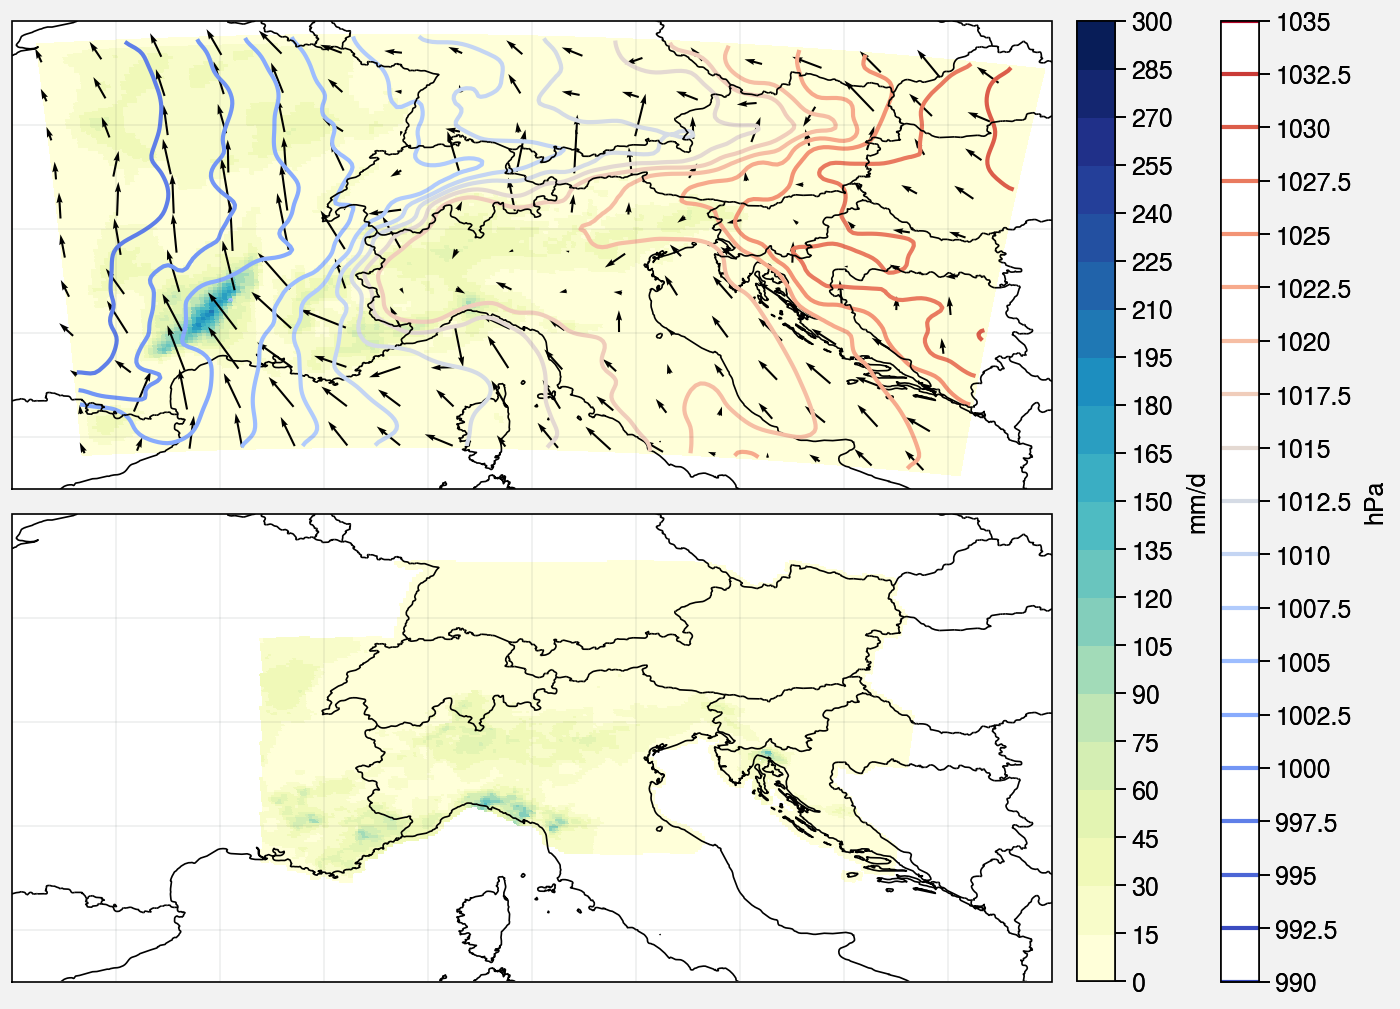

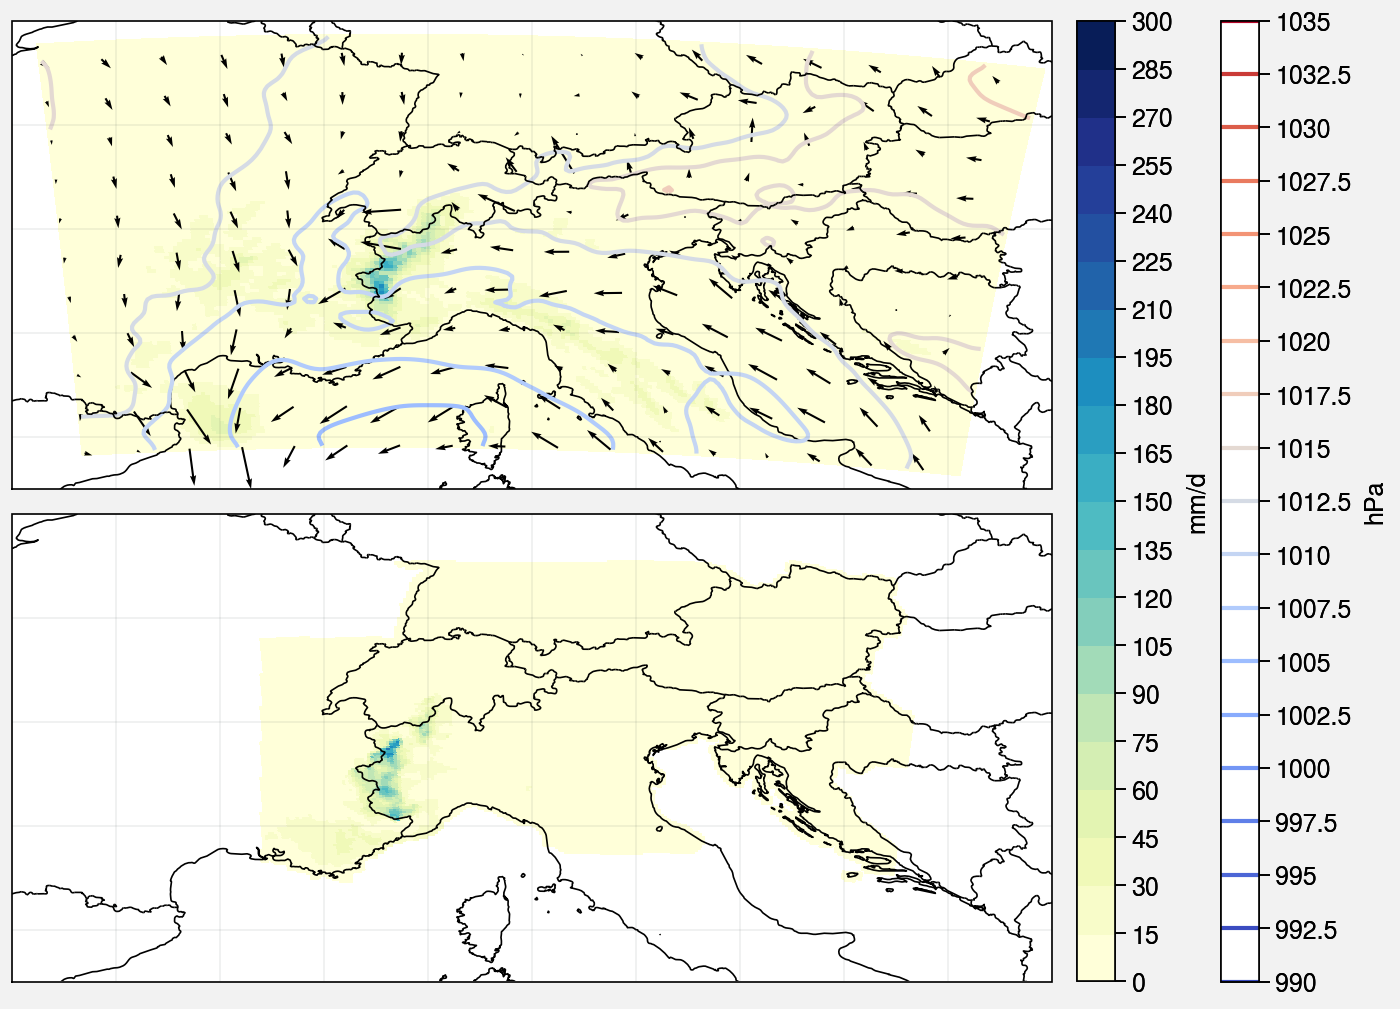

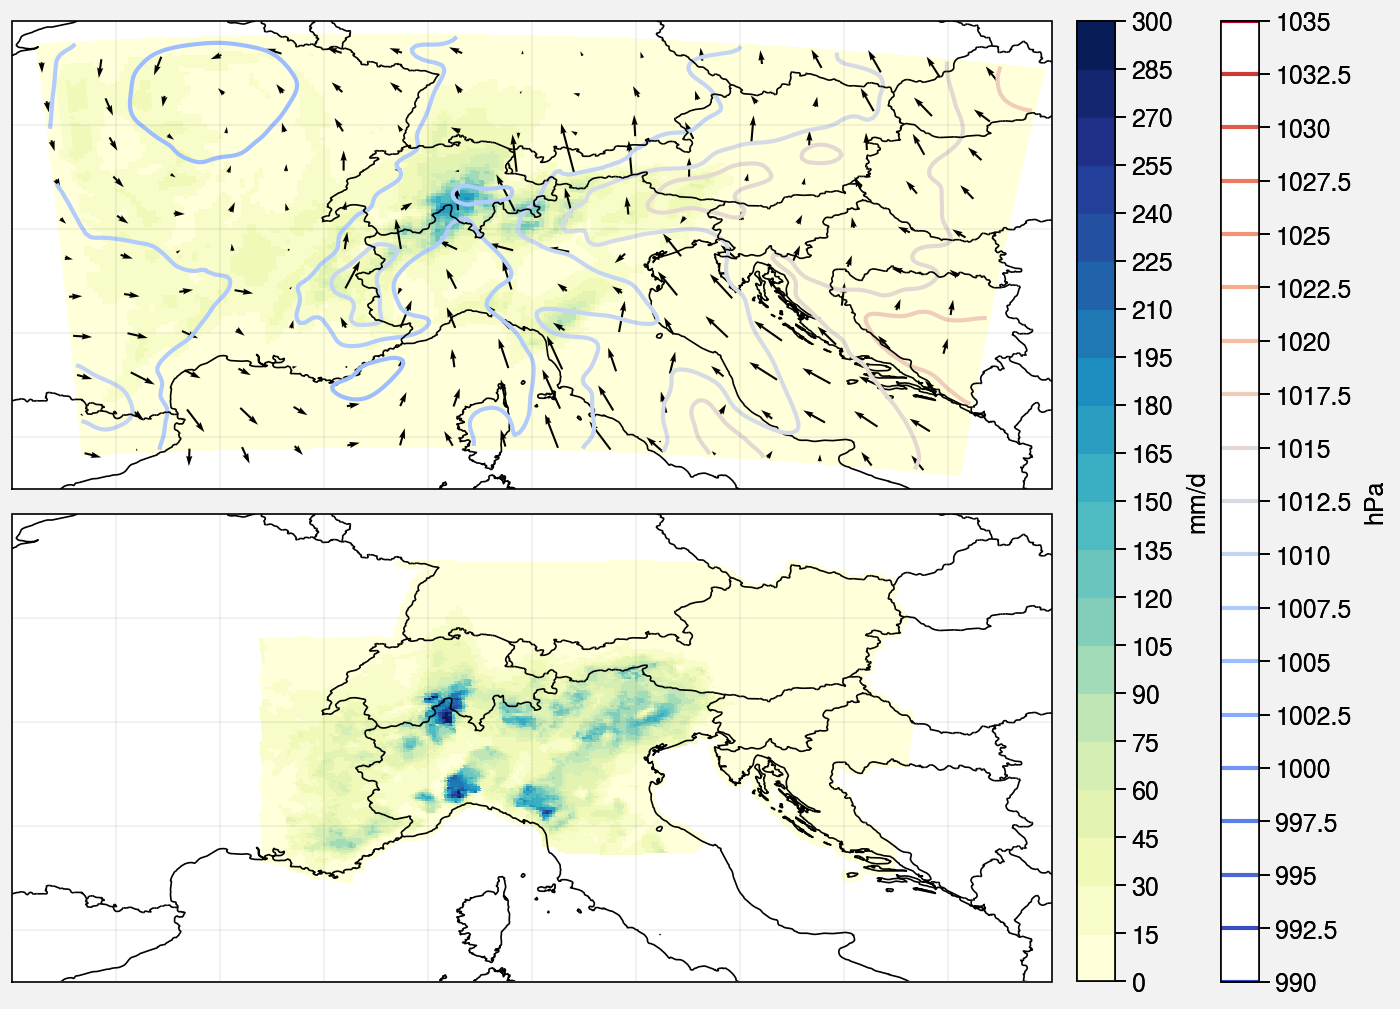

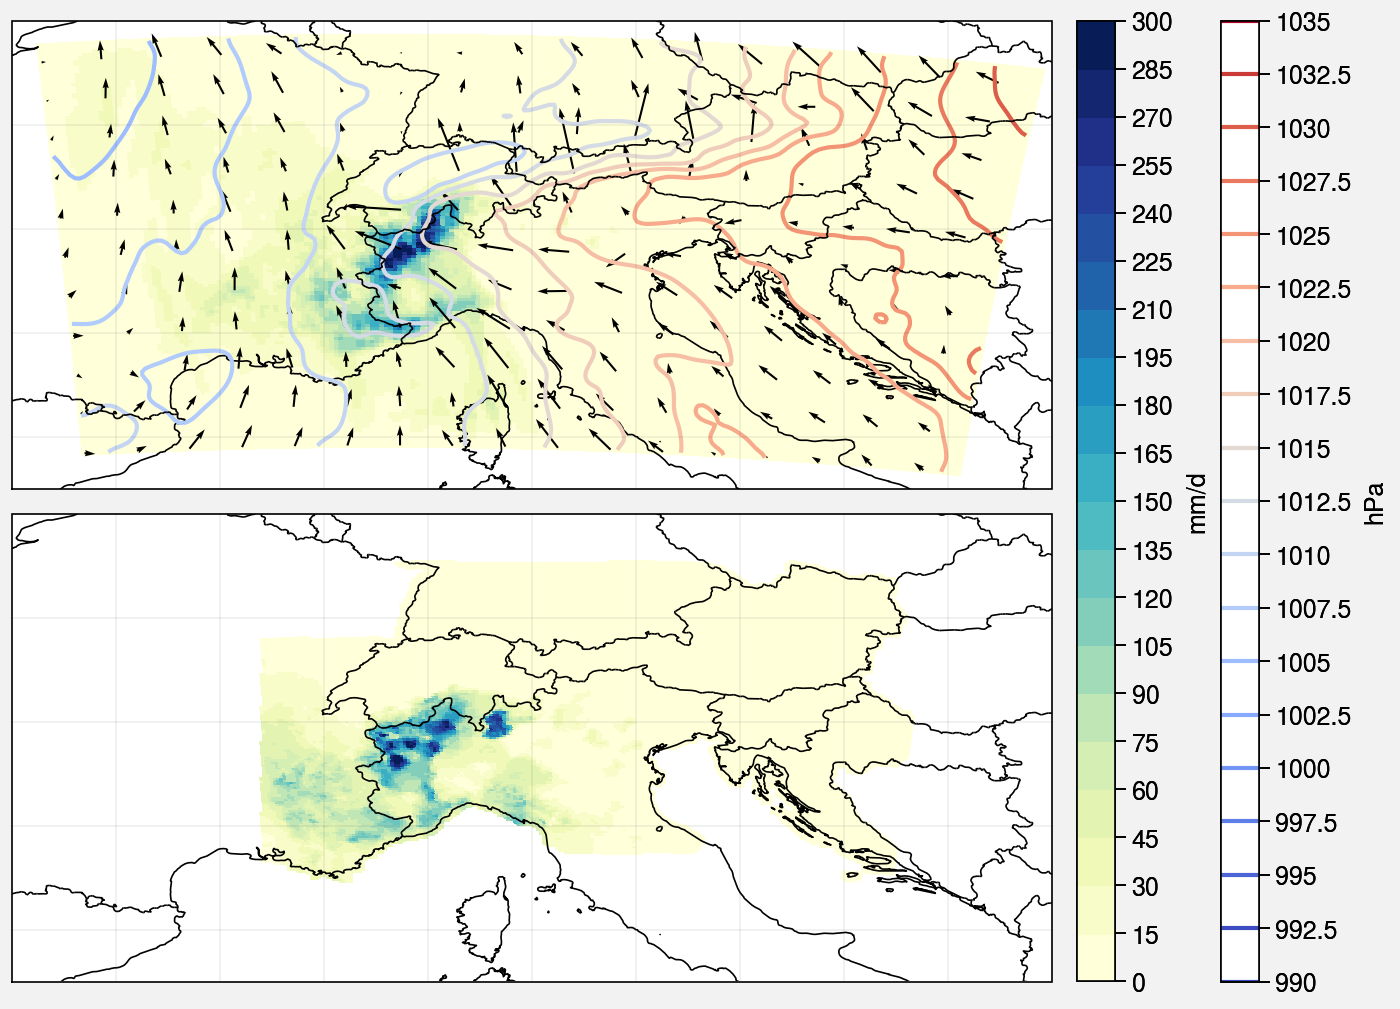

In [55]:
for s in range(4):
    t,j,i = np.unravel_index(les_season_max[:,s].argmax(), les_season_max[:,s].shape)
    print(s,t,j,i,np.max(les_season_max[:,s]))
for s in range(4):
    t,j,i = np.unravel_index(les_season_max[:28,s].argmax(), les_season_max[:28,s].shape)
    print(s,t,j,i,np.max(les_season_max[:28,s]))
for s in range(4):
    t,j,i = np.unravel_index(les_season_max[:28,s].argmax(), les_season_max[:28,s].shape)
    plot_event(1980+t,s,j+jmin,i+imin)

1994-11-05 349.04654


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


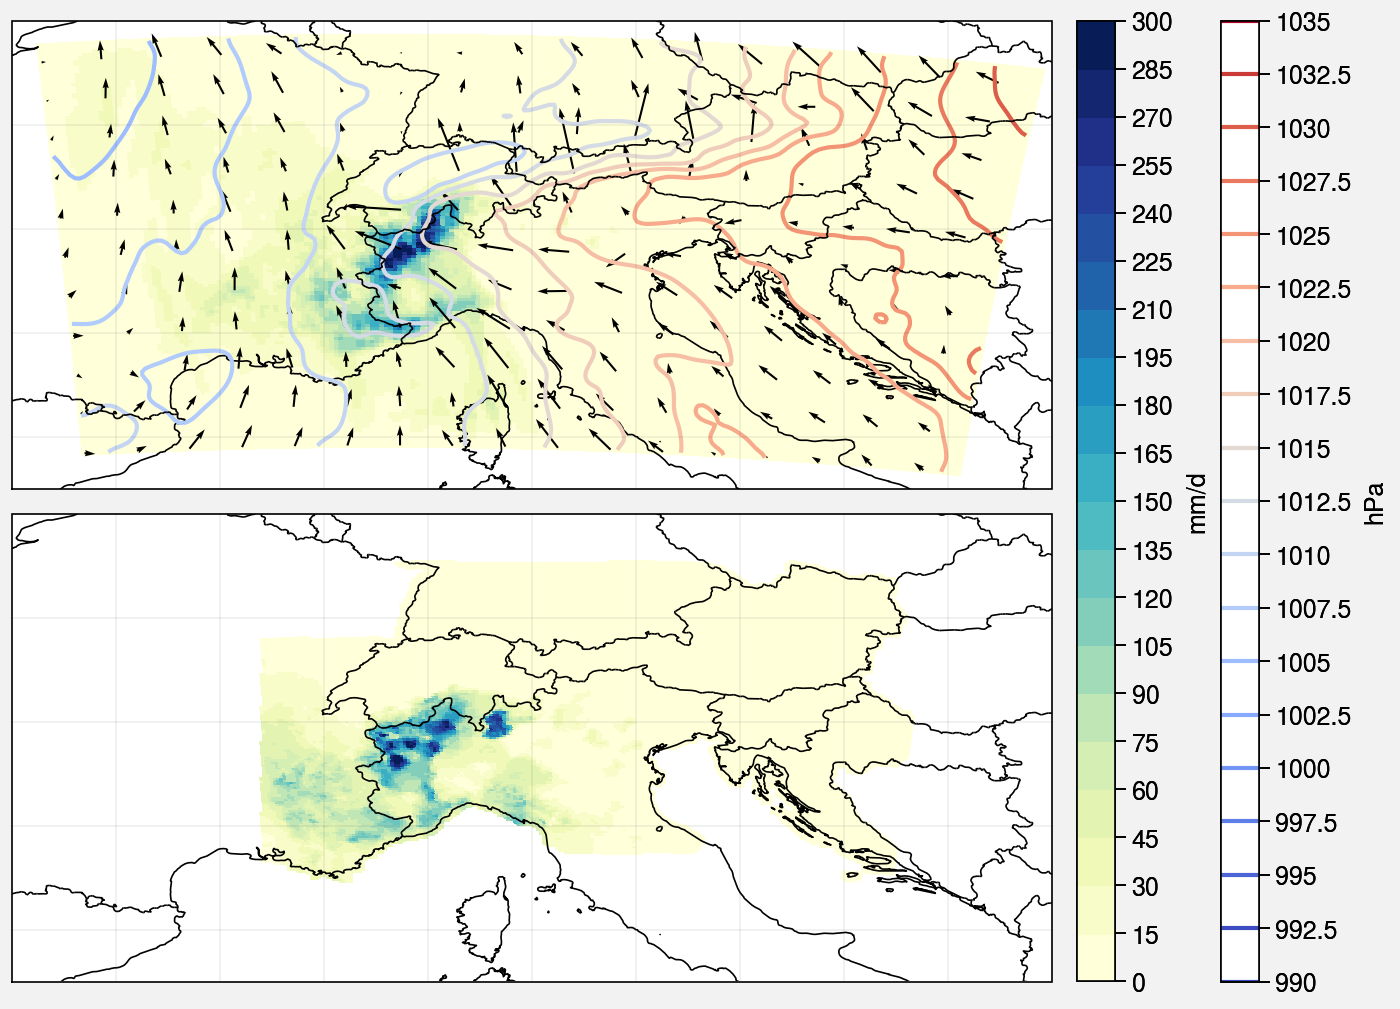

1987-08-24 193.46072


/home/philinat/miniconda3/envs/erca/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'Nchunk'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


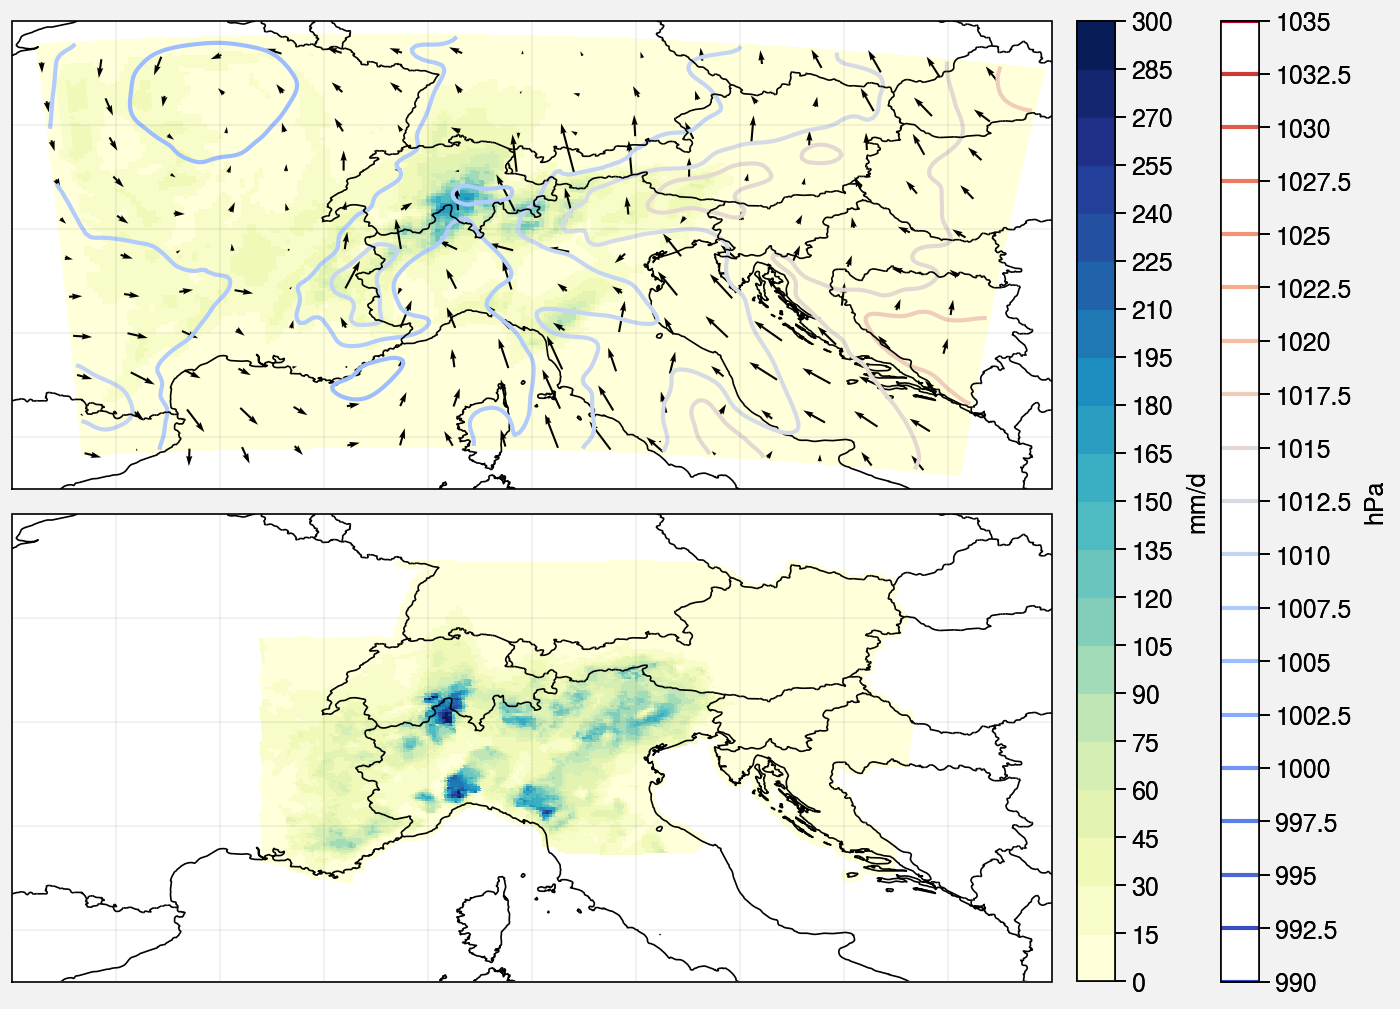

In [44]:
plot_event(1987,2,56+jmin,54+imin)

In [58]:
year = 1994
# xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_ERA20C/EUf/*/'+str(year)+'/ICE.*.'+str(year)+'.11.01-*.nc')
ds_ICE = xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/MAR_ALPES_ERA20C/EUf/f06/'+str(year)+'/ICE.f06.'+str(year)+'.11.01-30.nc')

In [60]:
ds_ICE.MBcp.data[4,:,:]

f, axs = pplt.subplots(proj='cyl',ncols=2, nrows=1,width=7)
cb_prec = axs[0].pcolormesh(lon,lat,ds_ICE.MBrr.data[4,:,:],levels=np.linspace(0,300,21),cmap='YlGnBu')
cb_prec = axs[1].pcolormesh(lon,lat,ds_ICE.MBcp.data[4,:,:],levels=np.linspace(0,300,21),cmap='YlGnBu')
cb_SLP = axs[0].contour(lon,lat,gaussian_filter(SLP, 2),levels=np.linspace(990,1035,19),cmap='coolwarm',Nchunk=3)
step=12
axs[0].quiver(lon[::step,::step],lat[::step,::step],U[::step,::step],V[::step,::step],width=0.002,scale=400)

f.colorbar(cb_prec,label= 'mm/d')
f.colorbar(cb_SLP,label= 'hPa')
# f.colorbar(cb_Q, ax=axs[2],label= 'g/kg')
axs.format(**full_format,suptitle='')#,rowlabels=['ERA5'])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)